In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# path to the database - change it if needed
path = 'face_data/'
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
'noglasses', 'normal', 'rightlight','sad',
'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png
# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)
X = np.zeros((D, N))
# collect all data
count = 0
target = []
# there are 15 people
for person_id in range(1, 16):
    for state in states:
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        target.append(state)
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        count += 1

165 77760 243 320


In [26]:
from sklearn.decomposition import PCA

# remain dim. k = 125 - change it! 
pca = PCA(n_components=100) 

# then apply to data X
X_pca = pca.fit_transform(X.T)

# then build projection matrix 
U = pca.components_.T

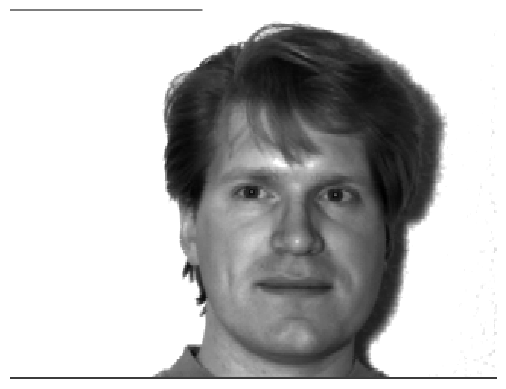

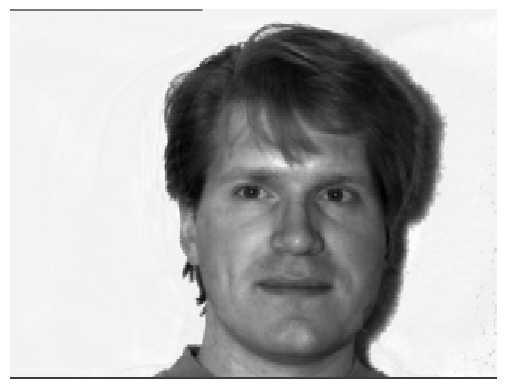

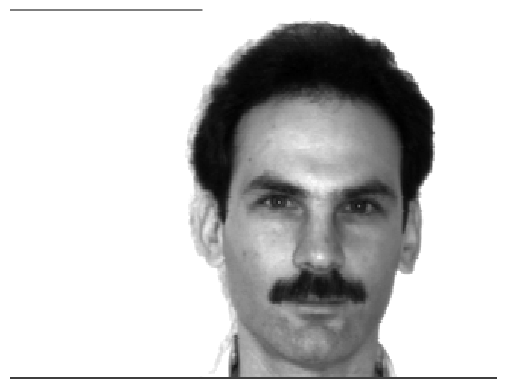

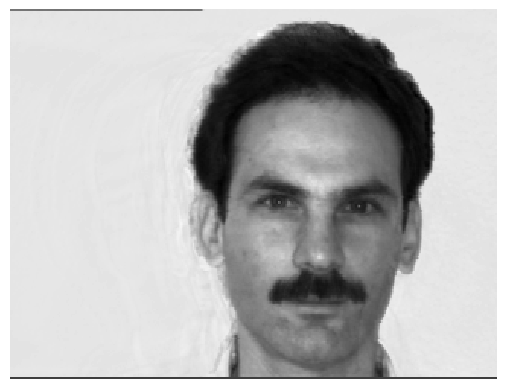

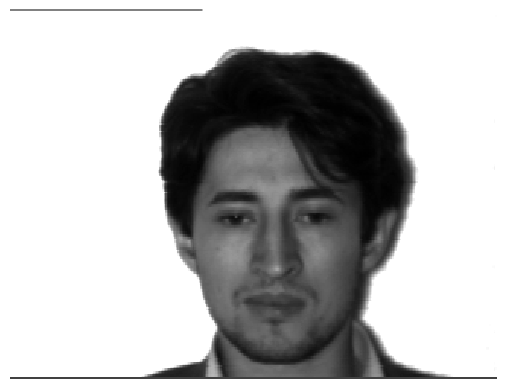

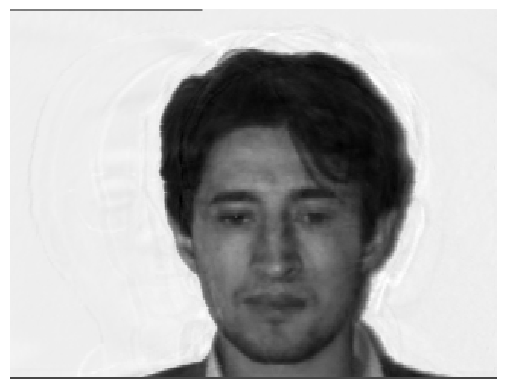

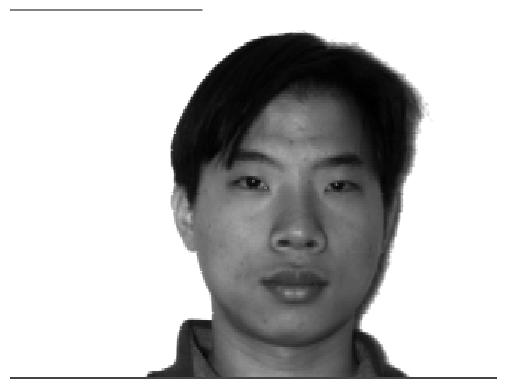

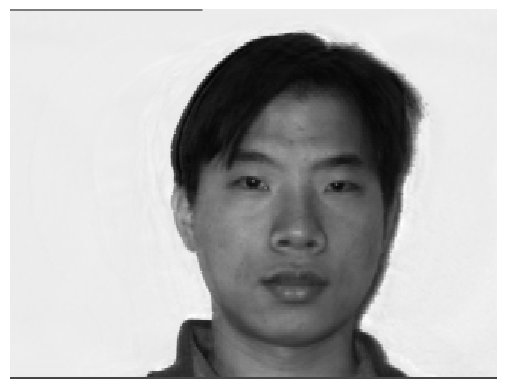

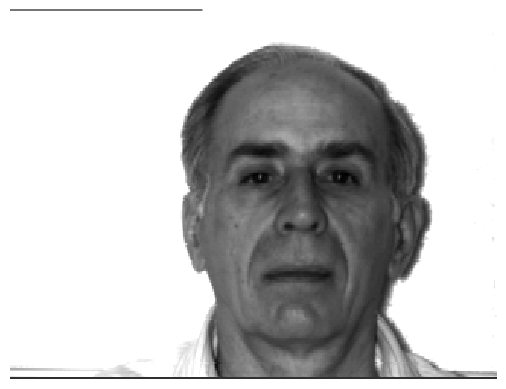

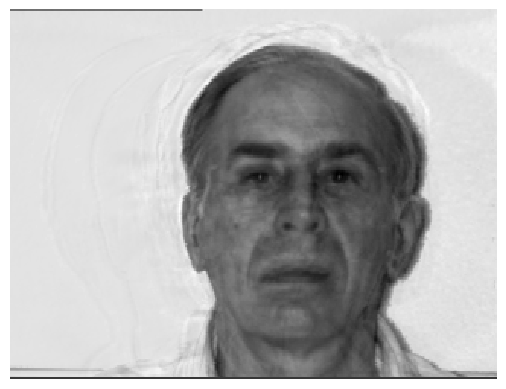

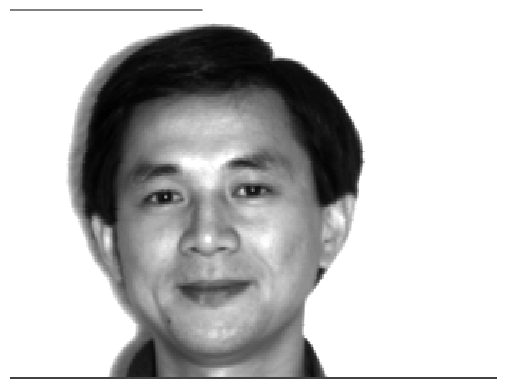

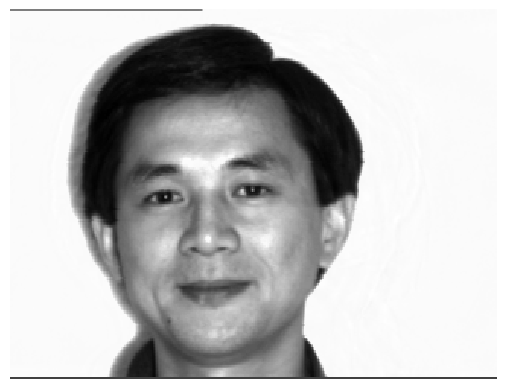

In [24]:
# then reshape new dataset (reduced dim.) to be new images and save
# path to save reduced dim. images 
path_save = 'face_data_results/'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

# test results by showing some images
# See reconstruction of first 6 persons 
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
        
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        
        # encode
        z = U.T.dot(x)
        
        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        
        # fn = 'res' + str(person_id).zfill(2) + '.png'
        #plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.3, random_state=42)

# Multinomial Logistic Regression
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy of Multinomial Logistic Regression:", accuracy_logreg)

# Naïve Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print("Accuracy of Naïve Bayes:", accuracy_naive_bayes)

Accuracy of Multinomial Logistic Regression: 0.12
Accuracy of Naïve Bayes: 0.12


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.neural_network import MLPClassifier
# Artificial Neural Networks (ANN)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
ann.fit(X_pca, target)
y_pred_ann = ann.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)

ANN Accuracy: 0.86
